df_encoded --> encoded dataset \
drug_df --> original dataset with random forest classfier predictions \
true_df--> sample output containing ID and Predictions  

In [61]:
import pandas as pd
import xgboost as xgb 
import numpy as nd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline


In [37]:
drug_df = pd.read_csv("train.csv")

In [3]:
drug_df.head()

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number,Target_Status
0,140736,T51115,D0L4YD,Small molecular drug,Approved,Solifenacin,154059,Overactive bladder,Approved,CAC1C_HUMAN,Voltage-gated calcium channel alpha Cav1.2 (CA...,CACNA1C,Voltage-gated calcium channel subunit alpha Ca...,Mediates influx of calcium ions into the cytop...,Voltage-gated ion channel,MVNENTRMYIPEENHQGSNYGSPRPAHANMNANAAAGLAPEHIPTP...,Genetic cardiac arrhythmia,Q13936,Terminated
1,133048,T60529,D03NMM,Small molecular drug,Investigative,AM-643,46843035,Dermatological disease,Investigative,PGH1_HUMAN,Prostaglandin G/H synthase 1 (COX-1),PTGS1,Prostaglandin-endoperoxide synthase 1; Prostag...,Converts arachidonate to prostaglandin H2 (PGH...,Paired donor oxygen oxidoreductase,MSRSLLLWFLLFLLLLPPLPVLLADPGAPTPVNPCCYYPCQHQGIC...,Rheumatoid arthritis,P23219,Approved
2,60493,T80975,D0T2ER,Small molecular drug,Phase 1,TAK-593,24767976,Solid tumour/cancer,Phase 1,VGFR2_HUMAN,Vascular endothelial growth factor receptor 2 ...,KDR,VEGFR2; VEGFR-2; VEGF-2 receptor; Protein-tyro...,Plays an essential role in the regulation of a...,Kinase,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,Renal cell carcinoma,P35968,Approved
3,169176,T92072,D07ESH,Small molecular drug,Discontinued in Phase 3,PF-1913539,176408,Alzheimer disease,Discontinued in Phase 3,AA1R_HUMAN,Adenosine A1 receptor (ADORA1),ADORA1,Adenosine receptor A1; A(1) adenosine receptor,The activity of this receptor is mediated by G...,GPCR rhodopsin,MPPSISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,Hyper-lipoproteinaemia,P30542,Phase 2
4,120183,T30082,D0Q0RC,Small molecular drug,Approved,Ethopropazine,3290,Parkinson disease,Approved,ACES_HUMAN,Acetylcholinesterase (AChE),ACHE,YT; N-ACHE; ARACHE,Role in neuronal apoptosis. Terminates signal ...,Carboxylic ester hydrolase,MRPPQCLLHTPSLASPLLLLLLWLLGGGVGAEGREDAELLVTVRGG...,Oesophageal/gastroduodenal disorder,P22303,Approved


In [4]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134486 entries, 0 to 134485
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         134486 non-null  int64 
 1   TargetID                   134486 non-null  object
 2   DRUGID                     134486 non-null  object
 3   DRUGTYPE                   134486 non-null  object
 4   Drug_high_status           134486 non-null  object
 5   DRUGNAME                   134486 non-null  object
 6   PUBCHCID                   134486 non-null  int64 
 7   Disease_of_highest_status  134486 non-null  object
 8   Drug_Status                134486 non-null  object
 9   UNIPROID                   134486 non-null  object
 10  TARGNAME                   134486 non-null  object
 11  GENENAME                   134486 non-null  object
 12  SYNONYMS                   134486 non-null  object
 13  FUNCTION                   134486 non-null  

In [5]:
df_encoded=drug_df.copy()

In [6]:
label_en=LabelEncoder()
select_cols=['TargetID','DRUGID','DRUGTYPE','Drug_high_status','DRUGNAME','PUBCHCID','Disease_of_highest_status','Drug_Status',
             'UNIPROID','TARGNAME','GENENAME','SYNONYMS','FUNCTION','BIOCLASS','SEQUENCE','Disease','Accession Number'
             ,'Target_Status']

for ele in select_cols:
    df_encoded[ele]=label_en.fit_transform(df_encoded[ele])

In [7]:
drug_df.head()

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number,Target_Status
0,140736,T51115,D0L4YD,Small molecular drug,Approved,Solifenacin,154059,Overactive bladder,Approved,CAC1C_HUMAN,Voltage-gated calcium channel alpha Cav1.2 (CA...,CACNA1C,Voltage-gated calcium channel subunit alpha Ca...,Mediates influx of calcium ions into the cytop...,Voltage-gated ion channel,MVNENTRMYIPEENHQGSNYGSPRPAHANMNANAAAGLAPEHIPTP...,Genetic cardiac arrhythmia,Q13936,Terminated
1,133048,T60529,D03NMM,Small molecular drug,Investigative,AM-643,46843035,Dermatological disease,Investigative,PGH1_HUMAN,Prostaglandin G/H synthase 1 (COX-1),PTGS1,Prostaglandin-endoperoxide synthase 1; Prostag...,Converts arachidonate to prostaglandin H2 (PGH...,Paired donor oxygen oxidoreductase,MSRSLLLWFLLFLLLLPPLPVLLADPGAPTPVNPCCYYPCQHQGIC...,Rheumatoid arthritis,P23219,Approved
2,60493,T80975,D0T2ER,Small molecular drug,Phase 1,TAK-593,24767976,Solid tumour/cancer,Phase 1,VGFR2_HUMAN,Vascular endothelial growth factor receptor 2 ...,KDR,VEGFR2; VEGFR-2; VEGF-2 receptor; Protein-tyro...,Plays an essential role in the regulation of a...,Kinase,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,Renal cell carcinoma,P35968,Approved
3,169176,T92072,D07ESH,Small molecular drug,Discontinued in Phase 3,PF-1913539,176408,Alzheimer disease,Discontinued in Phase 3,AA1R_HUMAN,Adenosine A1 receptor (ADORA1),ADORA1,Adenosine receptor A1; A(1) adenosine receptor,The activity of this receptor is mediated by G...,GPCR rhodopsin,MPPSISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,Hyper-lipoproteinaemia,P30542,Phase 2
4,120183,T30082,D0Q0RC,Small molecular drug,Approved,Ethopropazine,3290,Parkinson disease,Approved,ACES_HUMAN,Acetylcholinesterase (AChE),ACHE,YT; N-ACHE; ARACHE,Role in neuronal apoptosis. Terminates signal ...,Carboxylic ester hydrolase,MRPPQCLLHTPSLASPLLLLLLWLLGGGVGAEGREDAELLVTVRGG...,Oesophageal/gastroduodenal disorder,P22303,Approved


In [8]:
df_encoded.head()

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number,Target_Status
0,140736,332,1645,4,0,2076,889,485,1,102,676,92,583,376,101,662,220,547,31
1,133048,402,394,4,11,76,2231,177,12,516,505,554,296,145,72,600,487,256,1
2,60493,547,2049,4,14,2125,2059,592,15,689,668,371,564,435,58,513,479,363,1
3,169176,636,760,4,8,1621,925,41,9,16,24,17,7,604,45,488,248,316,22
4,120183,210,1889,4,0,807,145,494,1,26,19,9,603,557,28,537,407,249,1


In [9]:
corr_mat =df_encoded[['Drug_high_status','Drug_Status']]
print(corr_mat)

        Drug_high_status  Drug_Status
0                      0            1
1                     11           12
2                     14           15
3                      8            9
4                      0            1
...                  ...          ...
134481                17           17
134482                16           16
134483                 0           21
134484                 0           15
134485                 3            4

[134486 rows x 2 columns]


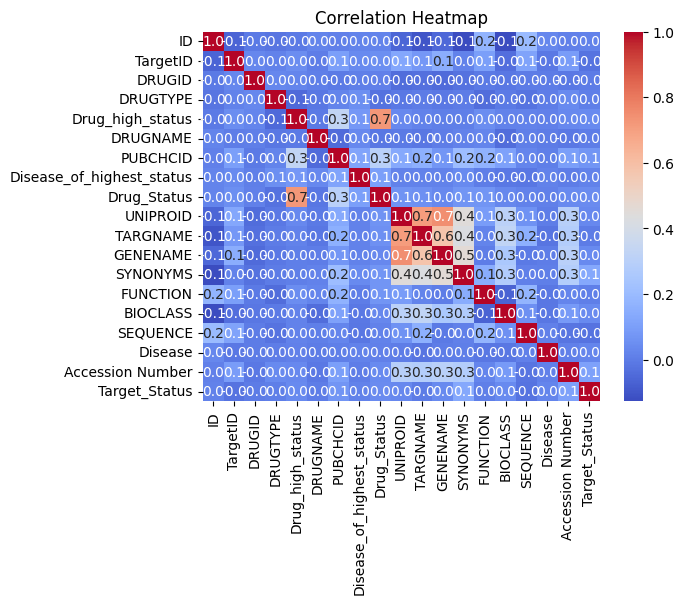

In [10]:

sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm').set(title='Correlation Heatmap')
plt.show()
     

In [11]:
drug_df.columns

Index(['ID', 'TargetID', 'DRUGID', 'DRUGTYPE', 'Drug_high_status', 'DRUGNAME',
       'PUBCHCID', 'Disease_of_highest_status', 'Drug_Status', 'UNIPROID',
       'TARGNAME', 'GENENAME', 'SYNONYMS', 'FUNCTION', 'BIOCLASS', 'SEQUENCE',
       'Disease', 'Accession Number', 'Target_Status'],
      dtype='object')

## Implementing Logistic Regression

In [12]:
X1=df_encoded[['ID','DRUGNAME','DRUGTYPE','GENENAME','Drug_high_status','Disease_of_highest_status','Drug_Status','BIOCLASS','Disease','SEQUENCE','TARGNAME']]
Y1=df_encoded['Target_Status']

In [13]:
# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2,random_state=42)


In [14]:
model_1=LogisticRegression()
model_1.fit(X1_train,Y1_train)

c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
Y1_predict=model_1.predict(X1_test)
acc_1=accuracy_score(Y1_test,Y1_predict)
cfmat_1=confusion_matrix(Y1_test,Y1_predict)
class_report_1=classification_report(Y1_test,Y1_predict)

c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [16]:
print(acc_1)

0.23206186333556397


In [17]:
print(cfmat_1)

[[   0    8    0 ...    0    0    0]
 [   0 4279    0 ...    0    0    0]
 [   0   26    0 ...    0    0    0]
 ...
 [   0   22    0 ...    0    0    0]
 [   0  715    0 ...    0    0    0]
 [   0  230    0 ...    0    0    0]]


In [18]:
print(class_report_1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.23      0.69      0.35      6168
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        70
           5       0.00      0.00      0.00       475
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00      1177
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00       506
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        16
          14       0.00      0.00      0.00      1866
          15       0.00      0.00      0.00       628
          16       0.00      0.00      0.00         3
          17       0.00    

# Implementing Random Forest Classifier

In [19]:
drug_df.columns

Index(['ID', 'TargetID', 'DRUGID', 'DRUGTYPE', 'Drug_high_status', 'DRUGNAME',
       'PUBCHCID', 'Disease_of_highest_status', 'Drug_Status', 'UNIPROID',
       'TARGNAME', 'GENENAME', 'SYNONYMS', 'FUNCTION', 'BIOCLASS', 'SEQUENCE',
       'Disease', 'Accession Number', 'Target_Status'],
      dtype='object')

In [20]:
# df1_sample = drug_df.drop(columns=['TargetID', 'DRUGID','PUBCHCID','SYNONYMS','FUNCTION','Accession Number','UNIPROID','GENENAME','SEQUENCE', 'ID'],axis=1)

In [21]:
X2=df_encoded[['Drug_high_status','DRUGNAME', 'Disease_of_highest_status','Drug_Status', 'TARGNAME', 'GENENAME', 'BIOCLASS', 'SEQUENCE','Disease']]
Y2=df_encoded['Target_Status']
# Dropped from the COlumns : UNIPROID,GENENAME,SEQUENCE, ID
# CONFIRMED DROPPED COLUMNS :TARGETID, DRUGID,PUBCHID,SYNONYMS,FUNCTION,ACCESSION NUMBER 

In [22]:
# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2)


In [23]:
randomfc_1=RandomForestClassifier()
randomfc_1.fit(X2_train,Y2_train)

RandomForestClassifier()

In [24]:
Y2_predict=randomfc_1.predict(X2_test)
acc_2=accuracy_score(Y2_test,Y2_predict)
cfmat_2=confusion_matrix(Y2_test,Y2_predict)
class_report_2=classification_report(Y2_test,Y2_predict)

c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

In [25]:
print(acc_2)

0.9085433861253625


In [26]:
print(class_report_2)

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        20
           1       0.90      0.94      0.92      6123
           2       0.96      0.79      0.86        28
           3       1.00      1.00      1.00         3
           4       0.86      0.84      0.85        57
           5       0.91      0.88      0.90       462
           6       0.83      0.60      0.70        25
           7       0.90      0.88      0.89      1143
           8       0.90      1.00      0.95         9
           9       0.00      0.00      0.00         1
          10       0.89      0.82      0.86       516
          11       0.50      1.00      0.67         1
          12       1.00      0.70      0.82        30
          13       0.93      1.00      0.97        14
          14       0.92      0.90      0.91      1828
          15       0.91      0.92      0.92       608
          16       1.00      1.00      1.00         4
          17       0.92    

In [27]:
Y2_series=pd.Series(label_en.inverse_transform(Y2_predict))

**Method to Covert to df**
1. Y2_series=pd.Series(label_en.inverse_transform(Y2_predict))
2. Y2_series.index=X2_test.index
3. true_df=drug_df[['ID','Prediction']].iloc[Y2_series.index]


In [28]:
Y2_series.index=X2_test.index

In [29]:
Y2_series

73783                    Approved
14661                     Phase 2
33962                     Phase 1
123625                  Phase 1/2
76885                     Phase 2
                   ...           
347                      Approved
113349                    Phase 3
13515                     Phase 3
79912     Discontinued in Phase 2
31913                     Phase 3
Length: 26898, dtype: object

In [30]:
drug_df['Prediction']=pd.Series(Y2_series,index=Y2_series.index)

In [31]:
drug_df

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number,Target_Status,Prediction
0,140736,T51115,D0L4YD,Small molecular drug,Approved,Solifenacin,154059,Overactive bladder,Approved,CAC1C_HUMAN,Voltage-gated calcium channel alpha Cav1.2 (CA...,CACNA1C,Voltage-gated calcium channel subunit alpha Ca...,Mediates influx of calcium ions into the cytop...,Voltage-gated ion channel,MVNENTRMYIPEENHQGSNYGSPRPAHANMNANAAAGLAPEHIPTP...,Genetic cardiac arrhythmia,Q13936,Terminated,NaN
1,133048,T60529,D03NMM,Small molecular drug,Investigative,AM-643,46843035,Dermatological disease,Investigative,PGH1_HUMAN,Prostaglandin G/H synthase 1 (COX-1),PTGS1,Prostaglandin-endoperoxide synthase 1; Prostag...,Converts arachidonate to prostaglandin H2 (PGH...,Paired donor oxygen oxidoreductase,MSRSLLLWFLLFLLLLPPLPVLLADPGAPTPVNPCCYYPCQHQGIC...,Rheumatoid arthritis,P23219,Approved,NaN
2,60493,T80975,D0T2ER,Small molecular drug,Phase 1,TAK-593,24767976,Solid tumour/cancer,Phase 1,VGFR2_HUMAN,Vascular endothelial growth factor receptor 2 ...,KDR,VEGFR2; VEGFR-2; VEGF-2 receptor; Protein-tyro...,Plays an essential role in the regulation of a...,Kinase,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,Renal cell carcinoma,P35968,Approved,NaN
3,169176,T92072,D07ESH,Small molecular drug,Discontinued in Phase 3,PF-1913539,176408,Alzheimer disease,Discontinued in Phase 3,AA1R_HUMAN,Adenosine A1 receptor (ADORA1),ADORA1,Adenosine receptor A1; A(1) adenosine receptor,The activity of this receptor is mediated by G...,GPCR rhodopsin,MPPSISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,Hyper-lipoproteinaemia,P30542,Phase 2,NaN
4,120183,T30082,D0Q0RC,Small molecular drug,Approved,Ethopropazine,3290,Parkinson disease,Approved,ACES_HUMAN,Acetylcholinesterase (AChE),ACHE,YT; N-ACHE; ARACHE,Role in neuronal apoptosis. Terminates signal ...,Carboxylic ester hydrolase,MRPPQCLLHTPSLASPLLLLLLWLLGGGVGAEGREDAELLVTVRGG...,Oesophageal/gastroduodenal disorder,P22303,Approved,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134481,147910,T59328,D06WRF,Small molecular drug,Phase 2,KD019,10458325,Meningioma metastases,Phase 2,EGFR_HUMAN,Epidermal growth factor receptor (EGFR),EGFR,Receptor tyrosine-protein kinase erbB-1; Proto...,Receptor tyrosine kinase binding ligands of th...,Kinase,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,Chronic pain,P00533,Phase 2,NaN
134482,37688,T65236,D0WM5O,Small molecular drug,Phase 1/2,G1,5322399,Lymphoma,Phase 1/2,GPER1_HUMAN,G-protein coupled estrogen receptor 1 (GPER1),GPER1,Membrane estrogen receptor; Lymphocyte-derived...,Receptor for estrogen. .,GPCR rhodopsin,MDVTSQARGVGLEMYPGTAQPAAPNTTSPELNLSHPLLGTALANGT...,Lymphoma,Q99527,Phase 1/2,NaN
134483,30073,T47768,D04JHN,Small molecular drug,Approved,Hydromorphone,5284570,Chronic pain,Phase 3,OPRM_HUMAN,Opioid receptor mu (MOP),OPRM1,hMOP; Mu-type opioid receptor; Mu opioid recep...,Receptor for natural and synthetic opioids inc...,GPCR rhodopsin,MDSSAAPTNASNCTDALAYSSCSPAPSPGSWVNLSHLDGNLSDPCG...,Movement disorder,P35372,Investigative,NaN
134484,37855,T40276,D0O0LS,Small molecular drug,Approved,Entrectinib,25141092,Mammary analogue secretory carcinoma,Phase 1,KPCB_HUMAN,Protein kinase C beta (PRKCB),PRKCB,Protein kinase C beta type; PRKCB1; PKCB; PKC-...,Plays a key role in B-cell activation by regul...,Kinase,MADPAAGPPPSEGEESTVRFARKGALRQKNVHEVKNHKFTARFFKQ...,Malignant haematopoietic neoplasm,P05771,Phase 3,NaN


In [32]:
sample_df =drug_df[['ID','Prediction']]

In [33]:
true_df=drug_df[['ID','Prediction']].iloc[Y2_series.index]

In [34]:
true_df

,ID,Prediction
73783,135146,Approved
14661,119628,Phase 2
33962,94732,Phase 1
123625,147303,Phase 1/2
76885,129079,Phase 2
...,...,...
347,21766,Approved
113349,153833,Phase 3
13515,171287,Phase 3
79912,107064,Discontinued in Phase 2


In [35]:
true_df.to_csv("final.csv",index=False)

# Implementing  GridsearchCV and XG Boost 

In [62]:
model_3 = xgb.XGBClassifier()

In [63]:
X3=df_encoded[['Drug_high_status','DRUGNAME', 'Disease_of_highest_status','Drug_Status', 'TARGNAME', 'GENENAME', 'BIOCLASS', 'SEQUENCE','Disease']]
Y3=df_encoded['Target_Status']

# TANMAY PARAMETER DROPPED : -['TargetID','DRUGID','PUBCHCID','Accession Number','UNIPROID','SYNONYMS','FUNCTION','DRUGTYPE'],axis=1

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2,random_state=42)


In [64]:
# Defining the parameter Dictionary 
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'n_estimators': [100, 200, 300],     # Number of trees (boosting rounds)
    'max_depth': [3, 5, 7],              # Maximum depth of trees
    'subsample': [0.7, 0.8, 0.9],        # Subsampling ratio of the training set
    'colsample_bytree': [0.7, 0.8, 0.9], # Subsampling ratio of features per tree
}

In [65]:
# Setting up the grid-search-CV
grid_search = GridSearchCV(estimator=model_3,param_grid=param_grid,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)

In [ ]:
# Extracting the Best Parameters
grid_search.fit(X3_train, Y3_train)

In [57]:
model_3.fit(X3_train, Y3_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [58]:
Y3_predict=model_3.predict(X3_test)
acc_3=accuracy_score(Y3_test,Y3_predict)
cfmat_3=confusion_matrix(Y3_test,Y3_predict)
class_report_3=classification_report(Y3_test,Y3_predict)

In [59]:
print(acc_3)

0.9454606290430515


In [60]:
print(class_report_3)

              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.95      0.95      0.95      6168
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00         1
           4       0.96      0.94      0.95        70
           5       0.99      0.99      0.99       475
           6       0.92      0.92      0.92        24
           7       0.96      0.92      0.94      1177
           8       1.00      0.82      0.90        11
           9       1.00      1.00      1.00         3
          10       0.94      0.97      0.95       506
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        16
          14       0.97      0.96      0.96      1866
          15       0.97      0.99      0.98       628
          16       1.00      1.00      1.00         3
          17       0.93    